In [1]:
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

with open('boxing.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   accuracy      1563 non-null   int64 
 1   data          1563 non-null   object
 2   experimentId  1563 non-null   int64 
 3   patientId     1563 non-null   int64 
 4   sensorId      1563 non-null   object
 5   sensorType    1563 non-null   int64 
 6   timestamp     1563 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 85.6+ KB


In [6]:
# List all unique Sensor Id (Name of the sensor)
distinct_sensor_types = df['sensorId'].unique()

# Print the distinct sensor Id (Names)
print("Distinct sensor name in dataset:")
for sensor_type in distinct_sensor_types:
    print("     " + sensor_type)

Distinct sensor id:
     icm4x6xx Accelerometer Non-wakeup
     device_orient  Non-wakeup
     oplus_activity_recognition  Wakeup
     elevator_detect  Wakeup
     linear_acceleration
     icm4x6xx Gyroscope Non-wakeup
     mmc56x3x Magnetometer Non-wakeup
     icm4x6xx Gyroscope-Uncalibrated Non-wakeup
     Game Rotation Vector  Non-wakeup
     icm4x6xx Accelerometer-Uncalibrated Non-wakeup
     Rotation Vector  Non-wakeup


In [ ]:

#timestamps = []
#x_data = []
#y_data = []
#z_data = []
#
#experiment_id = 6
#
#orientation_data = [entry for entry in data if entry["sensorId"] == "Orientation Sensor" and entry['experimentId'] == experiment_id]
#gyroscope_data = [entry for entry in data if entry["sensorId"] == "LSM6DSO Gyroscope" and entry['experimentId'] == experiment_id]
#accelerometer_data = [entry for entry in data if entry["sensorId"] == "LSM6DSO Accelerometer" and entry['experimentId'] == experiment_id]
#step_counter_data = [entry for entry in data if entry["sensorId"] == "Step Counter Sensor" and entry['experimentId'] == experiment_id]
#step_detector_data = [entry for entry in data if entry["sensorId"] == "Step Detector Sensor" and entry['experimentId'] == experiment_id]

# Acceleration

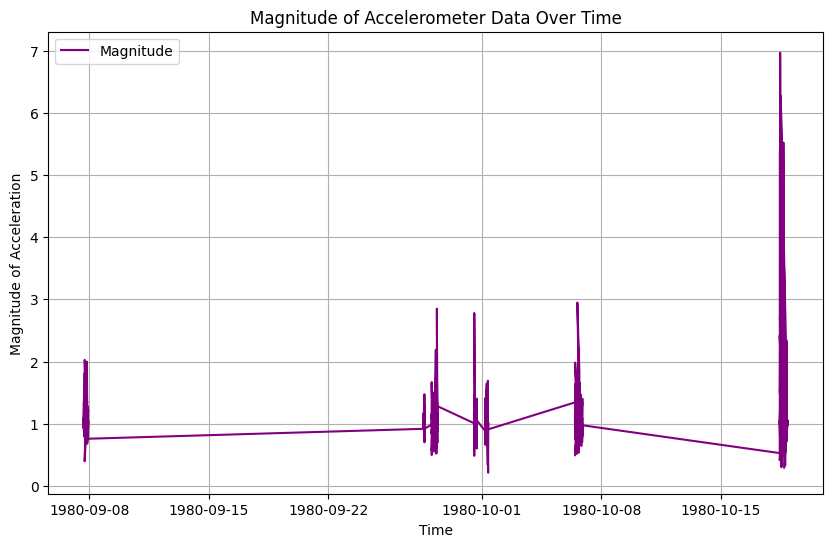

In [59]:
timestamps = [datetime.fromtimestamp(point['timestamp'] / 1000000.0) for point in accelerometer_data]
x_values = [point['data'][0] for point in accelerometer_data]
y_values = [point['data'][1] for point in accelerometer_data]
z_values = [point['data'][2] for point in accelerometer_data]

# Calculating magnitude of acceleration in g
magnitude_acceleration = np.sqrt(np.array(x_values)**2 + np.array(y_values)**2 + np.array(z_values)**2) / 9.81

# Plotting magnitude
plt.figure(figsize=(10, 6))
plt.plot(timestamps, magnitude_acceleration, label='Magnitude', color='purple')
plt.xlabel('Time')
plt.ylabel('Magnitude of Acceleration')
plt.title('Magnitude of Accelerometer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Orientation

/tmp/ipykernel_26510/4018422096.py:1: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamps = [datetime.utcfromtimestamp(point['timestamp'] / 10000000000.0) for point in gyroscope_data]


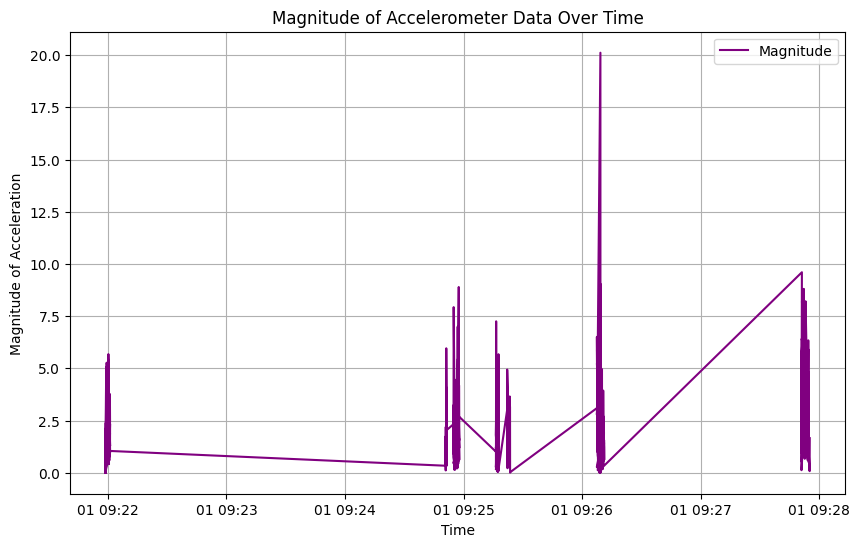

In [69]:
timestamps = [datetime.utcfromtimestamp(point['timestamp'] / 10000000000.0) for point in gyroscope_data]
x_values = [point['data'][0] for point in gyroscope_data]
y_values = [point['data'][1] for point in gyroscope_data]
z_values = [point['data'][2] for point in gyroscope_data]

# Calculating magnitude of angular velocity
magnitude_orientation = np.sqrt(np.array(x_values)**2 + np.array(y_values)**2 + np.array(z_values)**2)

# Plotting magnitude
plt.figure(figsize=(10, 6))
plt.plot(timestamps, magnitude_orientation, label='Magnitude', color='purple')
plt.xlabel('Time')
plt.ylabel('Magnitude of Acceleration')
plt.title('Magnitude of Accelerometer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Step Counter

[]


ValueError: x and y must have same first dimension, but have shapes (0,) and (918,)

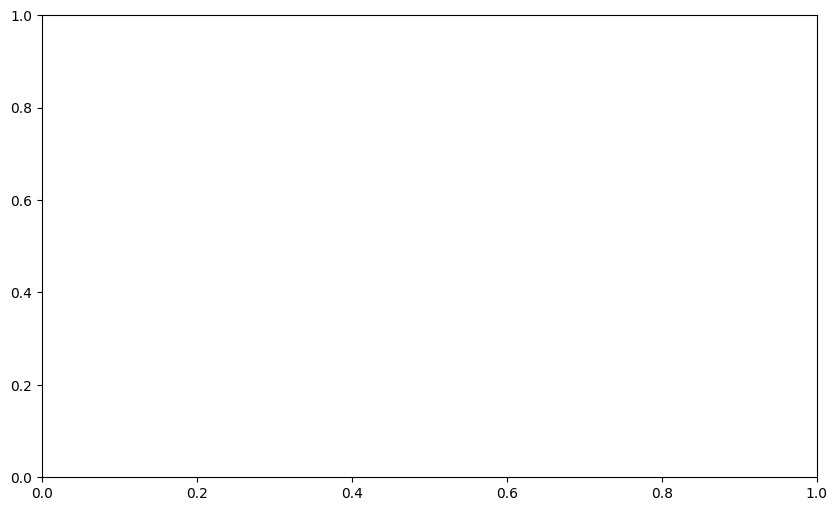

In [62]:
print(step_counter_data)
timestamps = [datetime.fromtimestamp(point['timestamp'] / 1000000.0) for point in step_counter_data]
x_values = [point['data'] for point in step_counter_data]

# Calculating magnitude of angular velocity

# Plotting magnitude
plt.figure(figsize=(10, 6))
plt.plot(timestamps, magnitude_orientation, label='Magnitude', color='purple')
plt.xlabel('Time')
plt.ylabel('Magnitude of Acceleration')
plt.title('Magnitude of Accelerometer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()